## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
#importing libraries

In [3]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

In [4]:
#importing csv, tsv files

In [5]:
bom_movie_gross_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\bom.movie_gross.csv')
rt_movie_info_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.movie_info.tsv', sep='\t')
rt_reviews_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.reviews.tsv', sep='\t', encoding = 'unicode_escape')
tmbd_movies_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tmdb.movies.csv')
tn_movie_budgets_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tn.movie_budgets.csv')

In [42]:
### Exploratory analysis

In [43]:
#viewing first 5 rows of bom_movie_gross_df

In [44]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [45]:
#printing a summary of bom_movie_gross_df

In [46]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
#printing descriptive statistics of bom_movie_gross_df

In [48]:
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [49]:
#viewing first 5 rows of rt_movie_info_df

In [50]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [51]:
#printing a summary of rt_movie_info_df

In [52]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [53]:
#printing descriptive statistics of rt_movie_info_df

In [54]:
rt_movie_info_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [55]:
# printing the first 5 rows of rt_reviews_df

In [56]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [57]:
# printing a summary of rt_reviews_df

In [58]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [59]:
# printing descriptive statistics of rt_reviews_df

In [60]:
rt_reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [61]:
#printing first 5 rows of tmbd_movies_df

In [62]:
tmbd_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [63]:
# printing a summary of tmbd_movies_df

In [64]:
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [65]:
#printing descriptive statistics of tmbd_movies_df

In [66]:
tmbd_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [67]:
#printing first 5 rows of tn_movie_budgets_df

In [68]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
# printing a summary of tn_movie_budgets_df

In [70]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [71]:
#printing descriptive statistics of tn_movie_budgets_df

In [72]:
tn_movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [73]:
### tn_movie_budgets_df cleaning

In [74]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')#removing commas in column

In [75]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '')#removing $ in column

In [76]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')#removing commas in column

In [77]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '')#removing $ in column

In [78]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')#removing commas in column

In [79]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '')#removing $ from column

In [81]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('int64')#converting values to type integer in column

In [82]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('int')#converting values in column to integer type

In [83]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace('\d+', '') #removing digit chars from release date to convert to month only

In [84]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(',', '')#removing commas from release date column values

In [85]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(' ', '')#removing empty space from release date column values

In [86]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].astype('str')#changing release date to string type

In [87]:
tn_movie_budgets_df.drop(tn_movie_budgets_df[tn_movie_budgets_df['worldwide_gross'] == 0].index, inplace = True)#dropping rows with 0 ww gross

In [88]:
tn_movie_gross_head = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=False).head(10)#sorting values of worldwide gross by descending

In [89]:
### Graphing top ten worldwide gross

Text(0.5, 1.0, 'Movie Vs Worldwide Gross (Top Ten)')

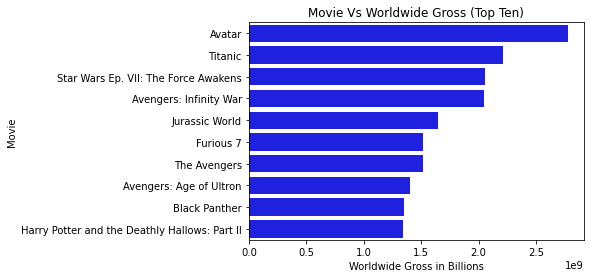

In [92]:
sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_head, color = 'Blue')

plt.xlabel('Worldwide Gross in Billions')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross (Top Ten)')

In [93]:
### Graphing production budget of top ten gross

Text(0.5, 1.0, 'Movie Vs Production Budget (Top Ten)')

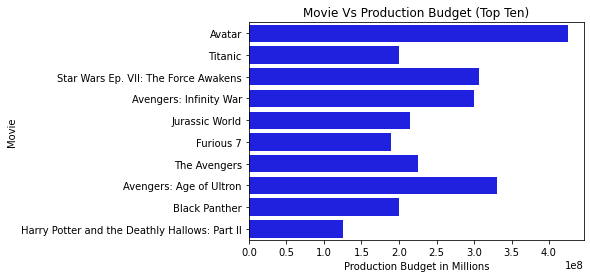

In [94]:
sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_head, color = 'Blue')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Top Ten)')

In [95]:
### Starting Graphs for bottom ten gross

In [96]:
tn_movie_gross_tail = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=True).head(10)#sorting values of worldwide gross by ascending

In [97]:
#graphing bottom ten worldwide gross

Text(0.5, 1.0, 'Movie Vs Worldwide Gross Bottom Ten')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


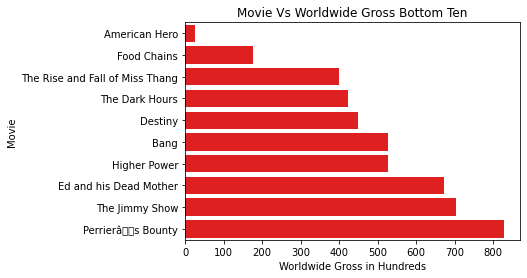

In [99]:
sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_tail, color = 'Red')

plt.xlabel('Worldwide Gross in Hundreds')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross Bottom Ten')

Text(0.5, 1.0, 'Movie Vs Production Budget (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


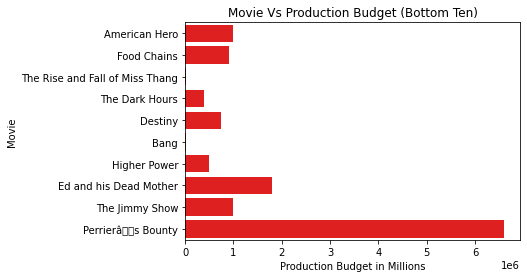

In [101]:
#making barplot for production budget of bottom ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_tail, color = 'Red')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Bottom Ten)')

In [102]:
# Scatter plot to show relation between money put in and money gotten out

Text(0.5, 1.0, 'Takes money to make money')

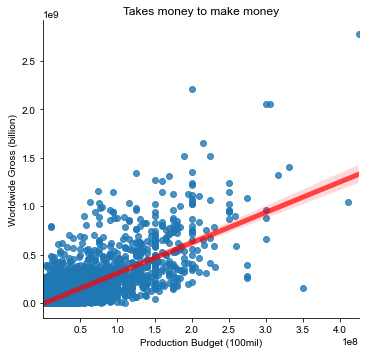

In [103]:
sns.lmplot(data=tn_movie_budgets_df, x='production_budget', y='worldwide_gross', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')


plt.xlabel("Production Budget (100mil)")
plt.ylabel("Worldwide Gross (billion)")
plt.title('Takes money to make money')

In [104]:
### Starting Release Month VS average Gross

In [105]:
release_date_group = tn_movie_budgets_df.groupby('release_date')#creating group of release date(month)

In [106]:
month_group_world = release_date_group.sum(['worldwide_gross'])#finding sum of worldwide gross in release date(month)

In [107]:
monthly_gross_avg = tn_movie_budgets_df.groupby('release_date')['worldwide_gross'].mean().astype('int64')#finding average of worldwide gross from releasedate group, setting to integer type

In [108]:
month_group_world['month_gross_avg'] = monthly_gross_avg.astype('int64')#setting month_group_world ti integer

In [109]:
month_group_world.reset_index(inplace=True)#resettting index of month group world

In [111]:
month_group_world.dtypes# checking datatypes 

release_date          object
id                     int64
production_budget    float64
worldwide_gross        int64
month_gross_avg        int64
dtype: object

In [112]:
#graphing average gross vs month of release

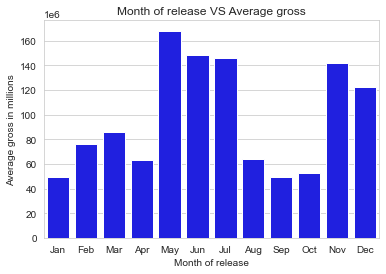

In [113]:
sns.barplot(x = 'release_date',
            y = 'month_gross_avg',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Average gross in millions')
plt.title('Month of release VS Average gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))

In [114]:
#graphing total worldwide gross vs month of release

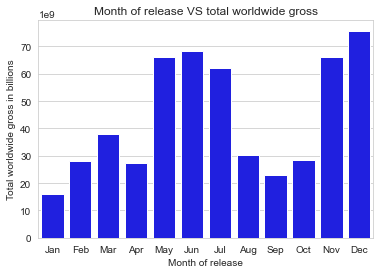

In [115]:
sns.barplot(x = 'release_date',
            y = 'worldwide_gross',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Total worldwide gross in billions')
plt.title('Month of release VS total worldwide gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))

In [117]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
Untitled.ipynb
Unzipped Data
UnzippedData
awesome.gif
dsc-phase-1-project-v2-4
im.db
movie_data_erd.jpeg
my work-Copy1.ipynb
my work.ipynb
student.ipynb
zippedData


In [118]:
#importing SQL db

In [119]:
conn = sql.connect("im.db")

In [120]:
type(conn)

sqlite3.Connection

In [121]:
cur = conn.cursor()

In [122]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [123]:
#query of the average number of votes from SQL db movie_ratings

In [124]:
avg_votes = pd.read_sql("""
SELECT avg(numvotes)
FROM movie_ratings
""", conn)

In [125]:
avg_votes

,avg(numvotes)
0,3523.662167


In [126]:
#query of average ratings above 9 for writers

In [127]:
query1 = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, numvotes
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500 AND averagerating >= 9.0
""", conn)

In [128]:
query1

,averagerating,primary_name,numvotes
0,9.4,Ram,9629
1,9.4,Anjana Krishnakumar,9629
2,9.0,Mari Selvaraj,4854
3,9.3,Alper Caglar,100568
4,9.3,Syed Gaosul Alam Shaon,18470
5,9.3,Anam Biswas,18470
6,9.3,Adnan Adib Khan,18470
7,9.2,Mahesh Manjrekar,4297
8,9.2,Abhijeet Shirish Deshpande,4297
9,9.2,Kiran Yadnyopavit,4297


In [129]:
query1.sort_values('averagerating', ascending=False)#sorting by top average writers

,averagerating,primary_name,numvotes
17,9.7,Quentin Tarantino,5600
10,9.5,Saman Weeraman,6509
1,9.4,Anjana Krishnakumar,9629
0,9.4,Ram,9629
4,9.3,Syed Gaosul Alam Shaon,18470
5,9.3,Anam Biswas,18470
6,9.3,Adnan Adib Khan,18470
3,9.3,Alper Caglar,100568
16,9.3,Donavon Warren,17308
7,9.2,Mahesh Manjrekar,4297


In [130]:
grouped_writers = query1.groupby('primary_name')#grouping writers by name
writer_avg_rating = grouped_writers.mean('averagerating')# finding average rating of writers
writer_avg_rating = writer_avg_rating.reset_index()#reseting index

In [131]:
writer_avg_rating.sort_values(by=['averagerating'], ascending=False)#sorting average rating writers by avgrating

,primary_name,averagerating,numvotes
13,Quentin Tarantino,9.7,5600
16,Saman Weeraman,9.5,6509
4,Anjana Krishnakumar,9.4,9629
14,Ram,9.4,9629
17,Syed Gaosul Alam Shaon,9.3,18470
2,Alper Caglar,9.3,100568
3,Anam Biswas,9.3,18470
7,Donavon Warren,9.3,17308
1,Adnan Adib Khan,9.3,18470
10,Mahesh Manjrekar,9.2,4297


In [132]:
#query movies/genre/writer with their average rating ahving more than 3500 votes
genre_query = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, genres, original_title, movie_basics.movie_id
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500
""", conn)

In [133]:
genre_query.sort_values('averagerating', ascending=False).head(50)#sorting genre query by average rating descending

,averagerating,primary_name,genres,original_title,movie_id
8810,9.7,Quentin Tarantino,"Comedy,Drama",Once Upon a Time ... in Hollywood,tt7131622
1935,9.5,Saman Weeraman,"Drama,History",Aloko Udapadi,tt5963218
888,9.4,Anjana Krishnakumar,Drama,Peranbu,tt7738784
887,9.4,Ram,Drama,Peranbu,tt7738784
1678,9.3,Syed Gaosul Alam Shaon,"Crime,Mystery,Thriller",Aynabaji,tt5354160
6934,9.3,Donavon Warren,Drama,Wheels,tt2170667
1616,9.3,Alper Caglar,"Action,Drama,War",Dag II,tt5813916
1679,9.3,Anam Biswas,"Crime,Mystery,Thriller",Aynabaji,tt5354160
1680,9.3,Adnan Adib Khan,"Crime,Mystery,Thriller",Aynabaji,tt5354160
5336,9.2,Cem Yilmaz,"Comedy,Documentary",CM101MMXI Fundamentals,tt2592910


In [134]:
genre_query['genres'] = genre_query['genres'].str.replace('Sci-Fi', 'Sci_Fi')#changing sci-fi to sci_fi

In [135]:
grouped_genre = genre_query.groupby('genres')#grouping genres
genre_avg_rating = grouped_genre.mean('averagerating')#getting mean of average rating
genre_avg_rating = genre_avg_rating.reset_index()#resetting index of groouped genre

In [136]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#top ten average ratings by genre

,genres,averagerating
157,"Biography,Documentary,Drama",8.700000
149,Biography,8.600000
314,"Drama,Romance,Sport",8.500000
148,"Animation,History",8.300000
261,"Documentary,Family",8.300000
263,"Documentary,History,Music",8.300000
266,"Documentary,News",8.300000
103,"Adventure,Documentary,Drama",8.200000
272,"Drama,Family,Musical",8.200000
201,"Comedy,Drama,Thriller",8.166667


In [137]:
# seperating genres comma list 

In [138]:
genres_expanded = genre_query['genres'].str.split(',', expand=True)
genres_expanded.columns = ['Genres'+str(i) for i in genres_expanded.columns]

In [139]:
# concat back to dataframe

In [140]:
genres_expanded_concat = pd.concat([genre_query, genres_expanded], axis=1)

In [142]:
#creating new df with comma seperated genres as their own columns
genres_expanded_group = genres_expanded_concat.groupby(['Genres0', 'Genres1', 'Genres2'])
genre_avg_rating = genres_expanded_group.mean('averagerating')
genre_avg_rating = genre_avg_rating.reset_index()

In [143]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#sorting top ten averageratings by descending

,Genres0,Genres1,Genres2,averagerating
131,Biography,Documentary,Drama,8.700000
252,Drama,Romance,Sport,8.500000
212,Documentary,History,Music,8.300000
89,Adventure,Documentary,Drama,8.200000
216,Drama,Family,Musical,8.200000
169,Comedy,Drama,Thriller,8.166667
122,Animation,Drama,Romance,8.114286
136,Biography,Documentary,News,8.100000
134,Biography,Documentary,Music,8.087500
137,Biography,Documentary,Sport,8.075000


In [144]:
melted_genre = genre_avg_rating.melt(var_name='index', value_name='')# changing df to long

In [ ]:
### C

In [148]:
crosstab_genres = pd.crosstab(index=melted_genre[''], columns=melted_genre['index'])

In [150]:
crosstab_genres.tail(22)

index,Genres0,Genres1,Genres2,averagerating
,,,,
Action,72,0,0,0
Adventure,36,14,0,0
Animation,18,10,1,0
Biography,25,10,1,0
Comedy,41,29,5,0
Crime,17,20,9,0
Documentary,6,12,4,0
Drama,45,62,19,0
Family,1,13,11,0
